In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [83]:
df = pd.DataFrame()

start_year = 2000
cols = ['Name', 'Gender', 'Freq']

names_per_year = []
pop_per_year = []

f_name_count = []
m_name_count = []
name_ratio = []

f_freq = []
m_freq = []
pop_ratio = []

eric = []
erick = []
erik = []

max_f1 = []
max_f2 = []
max_m1 = []
max_m2 = []

max_names = []

name_count1 = 0
name_count2 = 0
freq1 = 0
freq2 = 0

ec_freq = 0
eck_freq = 0
ek_freq = 0

max_freq_f = 5
max_freq_m = 5

max_name_f = ''
max_name_m = ''

for i in range(0,17): 
    temp = pd.DataFrame(pd.read_csv('names/yob' + str(i + 2000) + '.txt',names=cols, header=None))
    temp.insert(2, 'Year', start_year)
    
    name_count1 = 0
    name_count2 = 0
    freq1 = 0
    freq2 = 0
    
    ec_freq = 0
    eck_freq = 0
    ek_freq = 0
    
    max_name_f = ''
    max_name_m = ''

    max_freq_f = 5
    max_freq_m = 5
    
    for n,g,f in zip(temp['Name'], temp['Gender'], temp['Freq']):
        if g == 'F':
            name_count1 += 1
            freq1 += f
            if max_freq_f < int(f):
                max_freq_f = f
                max_name_f = n
        if g == 'M':
            name_count2 += 1
            freq2 += f
            if n == 'Eric':
                ec_freq = f
            if n == 'Erick':
                eck_freq = f
            if n == 'Erik':
                ek_freq = f
            if max_freq_m < int(f):
                max_freq_m = f
                max_name_m = n
        
            
            
    
    f_name_count.append(name_count1)
    m_name_count.append(name_count2)
    name_ratio.append(f_name_count[i] / m_name_count[0])
    
    f_freq.append(freq1)
    m_freq.append(freq2)
    pop_ratio.append(f_freq[i] / m_freq[i])
    
    names_per_year.append(f_name_count[i] + m_name_count[i])
    pop_per_year.append(f_freq[i] + m_freq[i])
    
    eric.append(ec_freq)
    erick.append(eck_freq)
    erik.append(ek_freq)
    
    max_f1.append(max_name_f)
    max_f2.append(max_freq_f)
    max_m1.append(max_name_m)
    max_m2.append(max_freq_m)
    
    start_year += 1

In [84]:
years = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',
         '2011','2012','2013','2014','2015','2016']

eric_data = pd.DataFrame(eric, columns=['Value'], index=years)
erick_data = pd.DataFrame(erick, columns=['Value'], index=years)
erik_data = pd.DataFrame(erik, columns=['Value'], index=years)
pop_data = pd.DataFrame(pop_per_year, columns=['Value'], index=years)
pop_ratio_data = pd.DataFrame(pop_ratio, columns=['Value'], index=years)
name_ratio_data = pd.DataFrame(name_ratio, columns=['Value'], index=years)

for i in range(1,17):
    max_names.append(max_m1[i] + '\n' + max_f1[i])

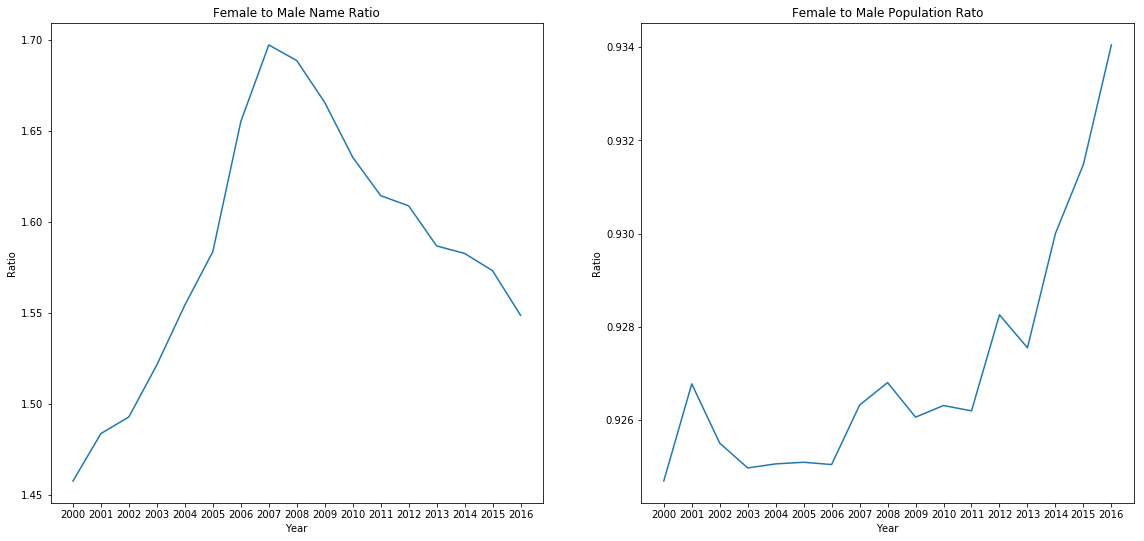

In [85]:
plt.figure(figsize=(30,30))
plt.tight_layout()

plt.subplot(3,3,1)
plt.plot(name_ratio_data)
plt.title('Female to Male Name Ratio')
plt.xlabel('Year')
plt.ylabel('Ratio')

plt.subplot(3,3,2)
plt.plot(pop_ratio_data)
plt.title('Female to Male Population Rato')
plt.xlabel('Year')
plt.ylabel('Ratio')

plt.show()

These two graphs show two different ratios.  The first shows how the ratio of female to male names that make the list and how it has changed over time.  While there was an increase in the ratio it started to decrease, after 2007.  Despite the change in the ratio, it is still over 1.0 across the entire period indicating that there are more female names than male names that meet th criteria of the data set.

The second plot shows the change in ratio of the number of individuals to be included in the data set.  As you can see, the ratio of females to males is increasing but it is consistently under 1.0.  This means that as time progresses, the general trend indicates that there will be eventually a ratio of 1.0, but as of now, the data shows that there are more males than females in the data set (despite there being more female names).

Overall, this means that there are more unique female names. 

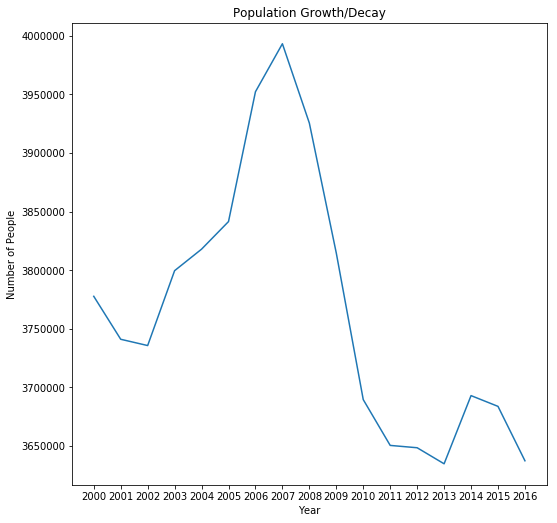

In [86]:
plt.figure(figsize=(8.5,8.5))
plt.tight_layout()

plt.plot(pop_data)
plt.title('Population Growth/Decay')
plt.xlabel('Year')
plt.ylabel('Number of People')

plt.show()

This plot shows the overall change in population over the time period.  As indicated, there is strong growth from 2002 to 2007, but after 2007, there is a harsh decline total population.

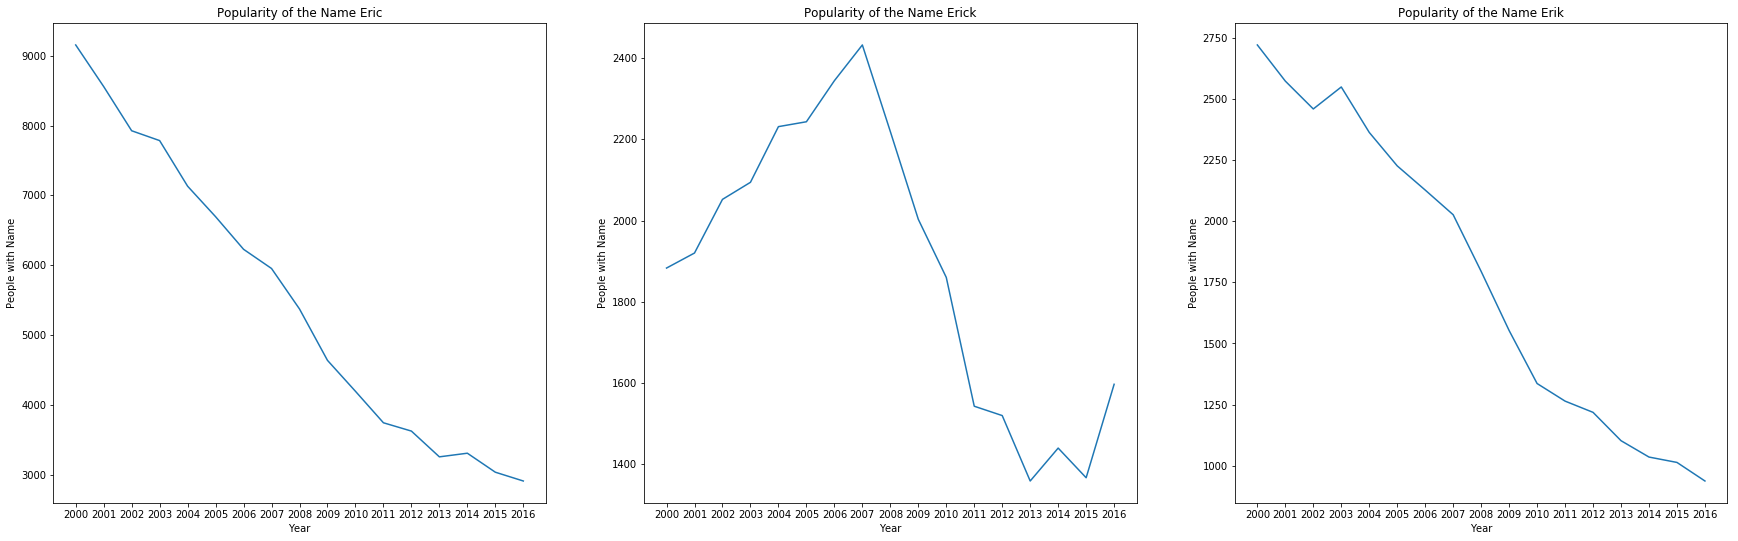

In [87]:
plt.figure(figsize=(30,30))
plt.tight_layout()

plt.subplot(3,3,1)
plt.plot(eric_data)
plt.title('Popularity of the Name Eric')
plt.xlabel('Year')
plt.ylabel('People with Name')

plt.subplot(3,3,2)
plt.plot(erick_data)
plt.title('Popularity of the Name Erick')
plt.xlabel('Year')
plt.ylabel('People with Name')

plt.subplot(3,3,3)
plt.plot(erik_data)
plt.title('Popularity of the Name Erik')
plt.xlabel('Year')
plt.ylabel('People with Name')

plt.show()

This plot is a personal choice of interest as it shows the popularity of my name, Eric, ands its variations over the 16 years.  All three had a strong declines, with both Eric and Erik still showing signs of decline, but Erick is showing a new growth.  Of the three, despite their change, Eric is still the most popular spelling of the name.  These plots may show that, over time, these names might move out of the scope of public favorites and eventually may not be included on the list. 

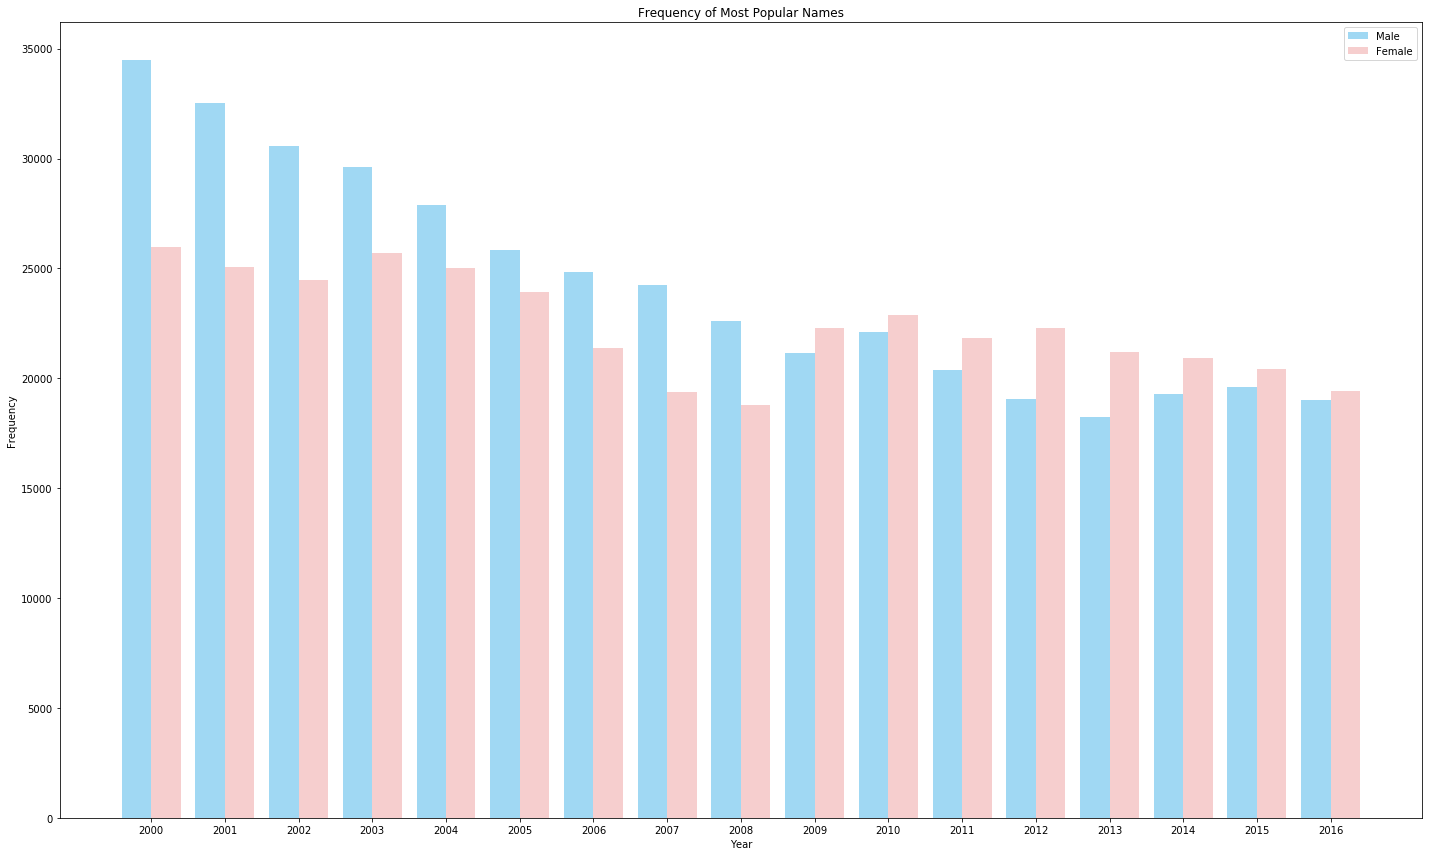

In [88]:
plt.figure(figsize=(20,12))
plt.tight_layout()

index = np.arange(0,17)
bar_width = 0.4
opacity = 0.8
 
rects1 = plt.bar(index, max_m2, bar_width,
                 alpha=opacity,
                 color='#89cff0',
                 label='Male')
 
rects2 = plt.bar(index + bar_width, max_f2, bar_width,
                 alpha=opacity,
                 color='#F4C2C2',
                 label='Female')
 
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Most Popular Names')
plt.xticks(index + (bar_width/2), years)
plt.legend()
 
plt.tight_layout()
plt.show()

This plot shows the comparison between the amount of individuals with the most popular male and the most popular female names for each year.  This indicates that there are a large percentage of individuals each year with the same name, but as time progressed, the size of the group with the most popular name shrinks.  This further shows that names are becoming more unique.   